In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
#from sklearn.cross_validation import cross_val_score
#from sklearn.cross_validation import StratifiedKFold
#from sklearn.cross_validation import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingRegressor as xgb 
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from scipy import stats 
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv("/home/anurag/ML/House_Price/train.csv")
test = pd.read_csv("/home/anurag/ML/House_Price/test.csv") 
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Missing values

In [3]:
frac = train.shape[0]*0.9 # number of non NA values we are satisfied with in each column . Lets say we need at least 90% non-NA values (columns with more than these will be dropped)
percent_missing = (100*(train.isnull().sum())/train.shape[0]).round(1) 
percent_missing.sort_values(ascending = False).head(20)

PoolQC          99.5
MiscFeature     96.3
Alley           93.8
Fence           80.8
FireplaceQu     47.3
LotFrontage     17.7
GarageCond       5.5
GarageType       5.5
GarageYrBlt      5.5
GarageFinish     5.5
GarageQual       5.5
BsmtExposure     2.6
BsmtFinType2     2.6
BsmtFinType1     2.5
BsmtCond         2.5
BsmtQual         2.5
MasVnrArea       0.5
MasVnrType       0.5
Electrical       0.1
Utilities        0.0
dtype: float64

In [4]:
train_cat = train[['BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual','Electrical','MasVnrArea','MasVnrType', 'GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt','MiscFeature','Fence','PoolQC','PoolArea','Alley','FireplaceQu']]

train_cat.head()

,BsmtFinType1,BsmtFinType2,BsmtCond,BsmtQual,Electrical,MasVnrArea,MasVnrType,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,MiscFeature,Fence,PoolQC,PoolArea,Alley,FireplaceQu
0,GLQ,Unf,TA,Gd,SBrkr,196.0,BrkFace,TA,RFn,TA,Attchd,2003.0,NaN,NaN,NaN,0,NaN,NaN
1,ALQ,Unf,TA,Gd,SBrkr,0.0,None,TA,RFn,TA,Attchd,1976.0,NaN,NaN,NaN,0,NaN,TA
2,GLQ,Unf,TA,Gd,SBrkr,162.0,BrkFace,TA,RFn,TA,Attchd,2001.0,NaN,NaN,NaN,0,NaN,TA
3,ALQ,Unf,Gd,TA,SBrkr,0.0,None,TA,Unf,TA,Detchd,1998.0,NaN,NaN,NaN,0,NaN,Gd
4,GLQ,Unf,TA,Gd,SBrkr,350.0,BrkFace,TA,RFn,TA,Attchd,2000.0,NaN,NaN,NaN,0,NaN,TA


# Categorical Variables

In [5]:
Categories = ['BsmtFinType1','BsmtFinType2','BsmtCond', 'BsmtQual','MasVnrType', 'GarageCond','GarageFinish','GarageQual','GarageType','GarageYrBlt','MiscFeature','FireplaceQu','Fence','PoolQC','Alley']
train[Categories] = train[Categories].replace(np.nan, 'None', inplace = True)        
train.head(10)

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [6]:
Noncat = ['LotFrontage','MasVnrArea']
imp = preprocessing.Imputer(missing_values='NaN', copy = False, strategy='mean', axis=0) # imputing missing values with mean
imp.fit(train[Noncat])

train= pd.get_dummies(data=train) # converting categorical variables to dummy variables encoded with 0,1....

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Feature Engineering

In [7]:
corr1 = train.corr()['SalePrice'] #array of correlation values for each variable vs. SalePrice 
corr =corr1[np.abs(corr1) > 0.5]  # just return correlation values greater than abs(0.5)
corr = pd.DataFrame(data=corr,columns= ['SalePrice'])
corr = corr.drop_duplicates().sort_values('SalePrice',ascending =False)
corr

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


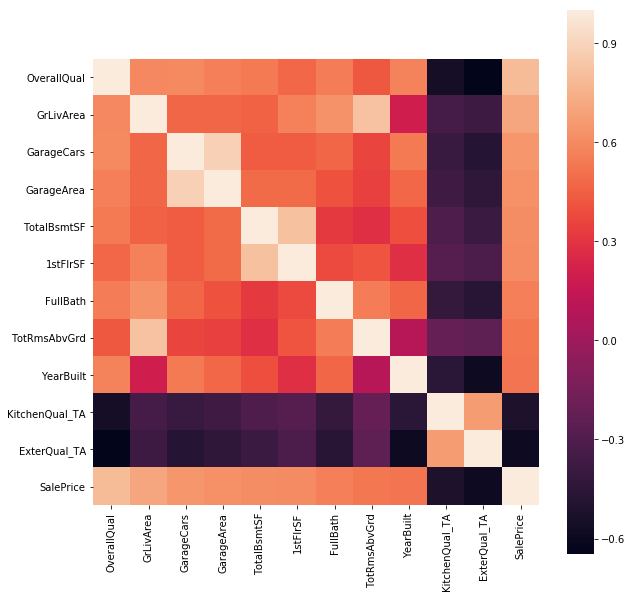

In [8]:
corr_var = ['OverallQual','GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','KitchenQual_TA', 'ExterQual_TA','SalePrice']
train = train[corr_var]
train
corr_matrix = train.corr()
f,ax = plt.subplots(figsize =(10,10))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, vmax=1,square=True)

Here GarageArea, TotalRmsAbvGrd, 1stFlrSF, KitchenQual, ExternalQual were dropped because they correlated less with sales price compare to the other variables they correlated with

In [9]:
labels_to_drop = ['GarageArea','TotRmsAbvGrd','1stFlrSF', 'KitchenQual_TA','ExterQual_TA']
train = train.drop(labels_to_drop, axis =1)
train.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,1710,2,856,2,2003,208500
1,6,1262,2,1262,2,1976,181500
2,7,1786,2,920,2,2001,223500
3,7,1717,3,756,1,1915,140000
4,8,2198,3,1145,2,2000,250000
5,5,1362,2,796,1,1993,143000
6,8,1694,2,1686,2,2004,307000
7,7,2090,2,1107,2,1973,200000
8,7,1774,2,952,2,1931,129900
9,5,1077,1,991,1,1939,118000


# Outlier detection

Here I will use scatter plots for the continous variables and boxplots for the categorical variables. We can use certain rules of thumb like: Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR Data points, three or more standard deviation away from mean If a few isolated points lie outside the general trend line, then they can be deleted.

/home/anurag/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Sale Price vs Garage Cars')

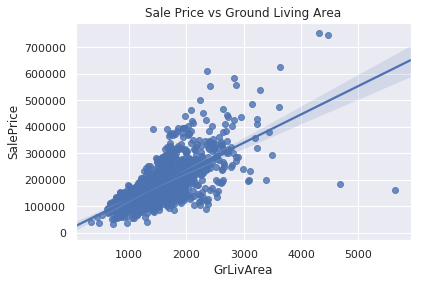

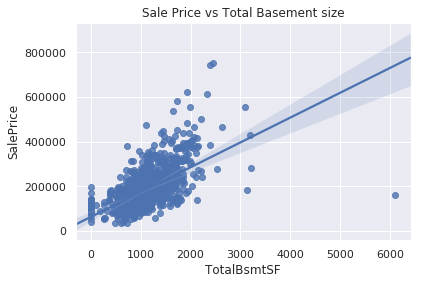

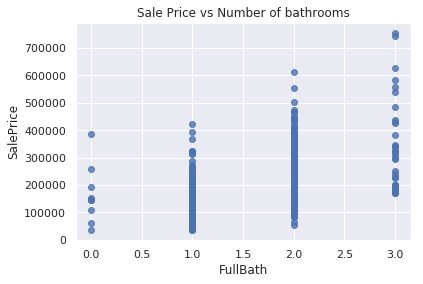

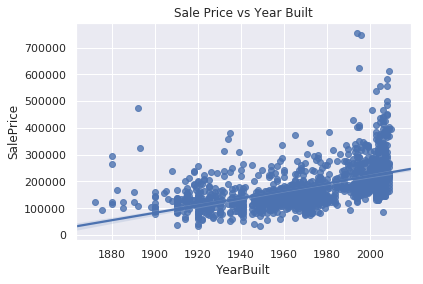

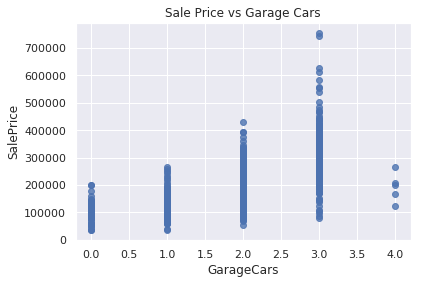

In [10]:
plt.figure(1)
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train)
plt.title('Sale Price vs Ground Living Area')

plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train)
plt.title('Sale Price vs Total Basement size')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="FullBath", y="SalePrice", data=train, fit_reg = False)
plt.title('Sale Price vs Number of bathrooms')

plt.figure(4)
sns.set(color_codes=True)
ax = sns.regplot(x="YearBuilt", y="SalePrice", data=train)
plt.title('Sale Price vs Year Built')


plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="GarageCars", y="SalePrice", data=train, fit_reg = False)
plt.title('Sale Price vs Garage Cars')

Four outliers in the graphs above will be dropped. These corresponding to ground living area > 4500 and sales price between 7000 and 8000 in Year Built graph.The isolated TotalBsmtSF point > 6000 is also included as part of these outliers which will be removed.



In [11]:
train =train.drop(train[train.GrLivArea == 5642].index)
train =train.drop(train[train.GrLivArea == 4476].index)
train =train.drop(train[train.SalePrice == 755000].index)
train =train.drop(train[train.SalePrice == 745000].index)

# Normality and linearity


/home/anurag/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


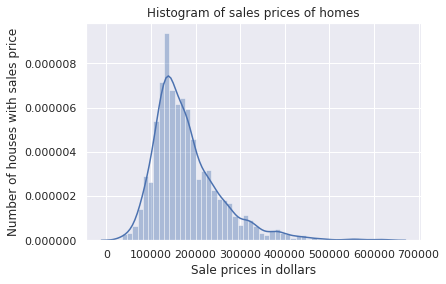

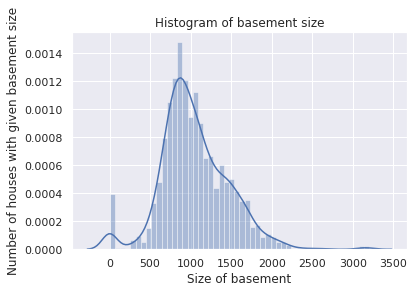

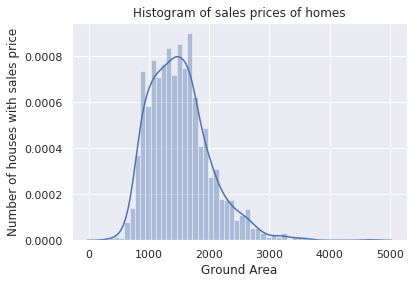

In [12]:
plt.figure(1)
sns.distplot(train['SalePrice'], 50)
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()


plt.figure(2)
sns.distplot(train['TotalBsmtSF'], 50)
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(train['GrLivArea'], 50)
plt.xlabel("Ground Area")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()

/home/anurag/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


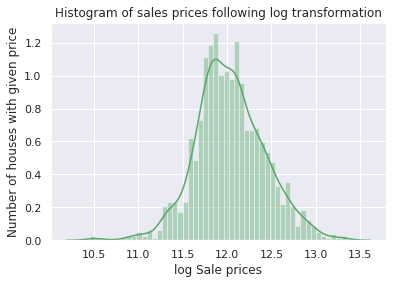

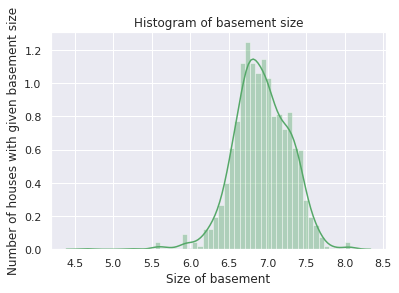

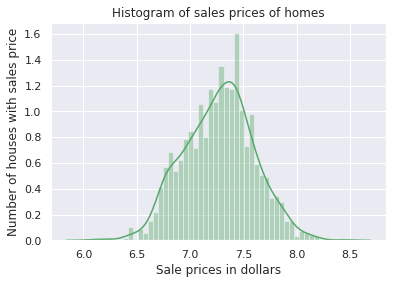

In [13]:
# Removing zero values in TotalBsmtSF to perform log transormation afterwards 
train_new = train.drop(train[train['TotalBsmtSF']==0].index, axis =0)

train_new.loc[:,['SalePrice','TotalBsmtSF','GrLivArea','YearBuilt']] = np.log(train_new[['SalePrice','TotalBsmtSF','GrLivArea','YearBuilt']])
plt.figure(1)
sns.distplot(train_new['SalePrice'], 50, color = "g")
plt.xlabel("log Sale prices")
plt.ylabel("Number of houses with given price") 
plt.title("Histogram of sales prices following log transformation")
plt.grid(True) 
plt.show()

plt.figure(2)
sns.distplot(train_new['TotalBsmtSF'], 50, color ="g")
plt.xlabel("Size of basement")
plt.ylabel("Number of houses with given basement size") 
plt.title("Histogram of basement size")
plt.grid(True) 
plt.show()

plt.figure(3)
sns.distplot(train_new['GrLivArea'], 50, color ="g")
plt.xlabel("Sale prices in dollars")
plt.ylabel("Number of houses with sales price") 
plt.title("Histogram of sales prices of homes")
plt.grid(True) 
plt.show()

The distrbutions are now centred and more normally distributed and less skewed.



/home/anurag/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Log Sale Price vs Log Total Basement size')

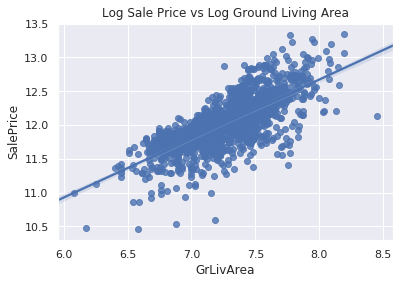

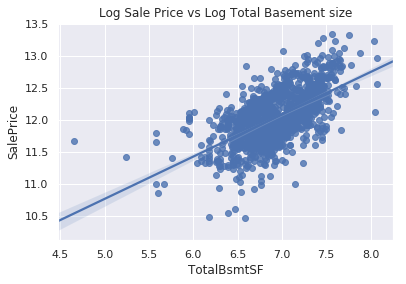

In [14]:
plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_new)
plt.title('Log Sale Price vs Log Ground Living Area')

plt.figure()
sns.set(color_codes=True)
ax = sns.regplot(x="TotalBsmtSF", y="SalePrice", data=train_new)
plt.title('Log Sale Price vs Log Total Basement size')

In [21]:
train_new.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,7.444249,2,6.752270,2,7.602401,12.247694
1,6,7.140453,2,7.140453,2,7.588830,12.109011
2,7,7.487734,2,6.824374,2,7.601402,12.317167
3,7,7.448334,3,6.628041,1,7.557473,11.849398
4,8,7.695303,3,7.043160,2,7.600902,12.429216


# Cleaning test data

Lets apply all the pre-processing tasks above to the test data. We can directly keep the same features in the test set as we did in the training set. We can then check if we need to replace any missing values. We will not need to create any dummy variables as all categorical variables were removed after correlation analysis.

In [15]:
var = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath','YearBuilt']

test_id = test[['Id']] # store id data n separate single column data frame 
test = test[var]
test.head(10)
test.shape[0] -((test[test.notnull()].count())) # number of missing values. It looks like Garage Cars and TotalBsmtSF have one
# Probably the same row. We can either drop this observation or impute it.

test['GarageCars'] = test['GarageCars'].fillna((test['GarageCars'].mean()))
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna((test['TotalBsmtSF'].mean()))

# taking log transform 
test[['TotalBsmtSF']] = test[['TotalBsmtSF']].replace(0,1)

test.loc[:,['TotalBsmtSF','GrLivArea', 'YearBuilt']] = np.log(test[['TotalBsmtSF','GrLivArea','YearBuilt']])

# Modelling

In [16]:
train_y = train_new['SalePrice']  #saving the output variable as a seperate dataset 
train_x = train_new.drop('SalePrice', axis =1) # dropping output variable from train dataset 
train_x.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,7.444249,2,6.752270,2,7.602401
1,6,7.140453,2,7.140453,2,7.588830
2,7,7.487734,2,6.824374,2,7.601402
3,7,7.448334,3,6.628041,1,7.557473
4,8,7.695303,3,7.043160,2,7.600902
5,5,7.216709,2,6.679599,1,7.597396
6,8,7.434848,2,7.430114,2,7.602900
7,7,7.644919,2,7.009409,2,7.587311
8,7,7.480992,2,6.858565,2,7.565793
9,5,6.981935,1,6.898715,1,7.569928


In [19]:

## Ridge Regression with built in cross validation ####
# by default it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.

clf_Ridge = linear_model.Ridge(fit_intercept=True, normalize=True, alpha = 0.01) 
clf_Ridge.fit(train_x, train_y)  
clf_Ridge_score = cross_val_score(clf_Ridge,train_x, train_y, cv = 10, scoring = 'r2')

### Support Vecotr Regression #####
X_scaler = preprocessing.StandardScaler()
train_x = X_scaler.fit_transform(train_x)
clf_SVR = svm.SVR(kernel='rbf', gamma='auto',C = 1,epsilon = 0.1)
clf_SVR.fit(train_x, train_y)
clf_SVR_score = cross_val_score(clf_SVR, train_x, train_y, cv = 10, scoring='r2') 

#### LassoCV######

clf_lasso = linear_model.LassoCV()
clf_lasso.fit(train_x, train_y)
clf_lasso_score = cross_val_score(clf_lasso, train_x, train_y, cv = 10, scoring='r2') 

### Gradient Boosting Regressor ##

clf_xgb = xgb(learning_rate=0.01, n_estimators=500, max_depth=3, subsample= 0.5)
clf_xgb.fit(train_x, train_y)
clf_xgb_score = cross_val_score(clf_xgb, train_x, train_y, cv = 10, scoring='r2') 

 #R squared coefficients for all the models after training 

print ("")
print("The R2 score using for Ridge is %f" % (clf_Ridge_score.mean()))
print("The R2 score for Lasso is %f" % (clf_lasso_score.mean())) 
print("The R2 score for SVR is %f" % (clf_SVR_score.mean())) 
print("The R2 score for Gradient Boosting Regression is %f" % (clf_xgb_score.mean())) 

test_x = X_scaler.fit_transform(test)
predict = pd.DataFrame(np.exp(clf_xgb.predict(test_x)), columns= ['SalePrice'])    # Predictions on the test set

/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(C


The R2 score using for Ridge is 0.825067
The R2 score for Lasso is 0.825010
The R2 score for SVR is 0.826482
The R2 score for Gradient Boosting Regression is 0.834628


/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anurag/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
submission = pd.concat([test_id, predict],axis =1)
submission.to_csv("/home/anurag/ML/House_Price/submission_XGB.csv",header = True, index =False)
